In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import plotting
import random
%matplotlib inline

In [3]:
f = h5py.File('./data/train_no_pile_100000a.h5','r')
print(list(f.keys()))

['features', 'targets']


In [5]:
print(f['features'].shape)
print(f['targets'].shape)
print(np.unique(f['targets']))
print(np.mean(f['features']))

(100000, 1, 32, 32)
(100000, 1)
[0. 1.]
0.34017718


In [ ]:
plt.plot(f['features'][:].reshape(100000,32*32))

 ...]

In [49]:
x,y = f['features'][:], f['targets'][:]
ibg, isig = np.where(y == 0)[0], np.where(y == 1)[0]
xbg, ybg = x[ibg], y[ibg]
xsig, ysig = x[isig], y[isig]
# xbg_tr, ybg_tr = xbg[:40000], ybg[:40000]
# xbg_te, ybg_te = xbg[40000:], ybg[40000:]

In [50]:
print(xbg.shape,ybg.shape,xsig.shape,ysig.shape)

(50060, 1, 32, 32) (50060, 1) (49940, 1, 32, 32) (49940, 1)


In [51]:
def plot2(a,b,vmax):
    fig = plt.figure(figsize=(10, 10))
    row,col=1,2
    fig.add_subplot(row,col,1)
    plt.imshow(a,cmap='Blues',vmin=-10,vmax=vmax)
    fig.add_subplot(row,col,2)
    plt.imshow(b,cmap='Reds',vmin=-10,vmax=vmax)
    #plt.show()
    plt.savefig("data.png")

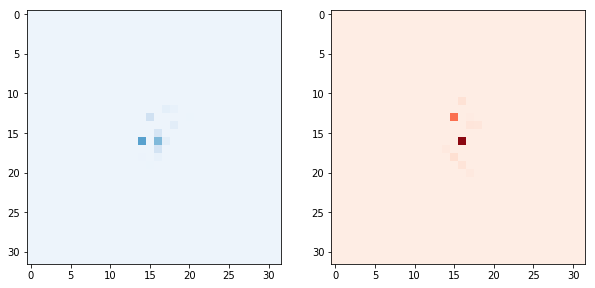

In [52]:
for i in random.sample(range(1,1000),1):
    plot2(xbg[i][0],xsig[i][0],200)

In [53]:
def plot2_nAgg(s,e,xbg,xsig,vmax):
    xbgg = np.copy(xbg[0][0])
    xsigg = np.copy(xsig[0][0])
    for i in range(s,e):
        xbgg += xbg[i][0]
        xsigg += xsig[i][0]
    plot2(xbgg,xsigg,vmax)

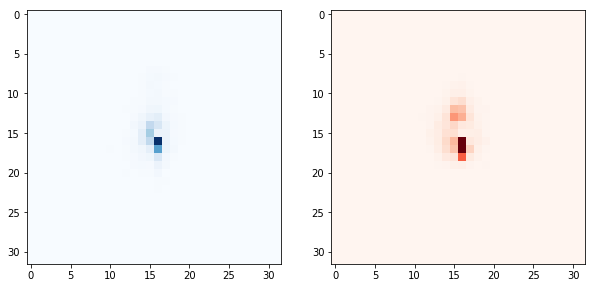

In [54]:
plot2_nAgg(0,1000,xbg,xsig,100*400)

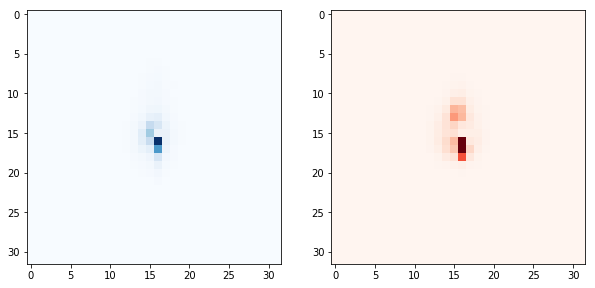

In [55]:
plot2_nAgg(0,40000,xbg,xsig,4000*400)

In [56]:
def flat(x):
    return x.reshape(x.shape[0],-1)
def fold(x):
    return x.reshape(x.shape[0],1,32,32)

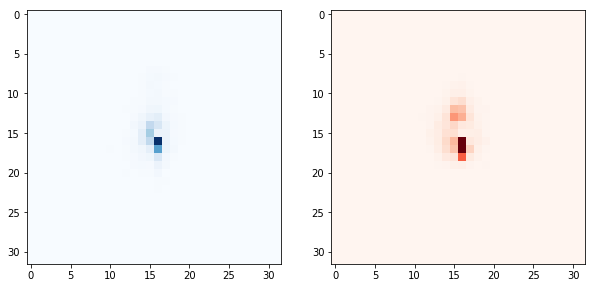

In [57]:
plotting.plot2_nAgg(0,1000,xbg,xsig,100*400,"dataexp.png")